___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>


# AutoEncoders on Image Data

## The Data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from tensorflow.keras.datasets import mnist

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

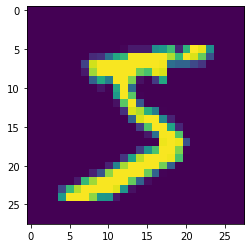

In [16]:
plt.imshow(X_train[0])

In [17]:
X_train = X_train/255
X_test = X_test/255

## Basic AutoEncoder

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [19]:
783/2

391.5

In [20]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [21]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [29]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=1.5),metrics=['accuracy'])

In [30]:
autoencoder.fit(X_train, X_train, epochs=5, validation_data=(X_test, X_test))

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1565 - accuracy: 0.1975 - val_loss: 0.1474 - val_accuracy: 0.2069
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1456 - accuracy: 0.2137 - val_loss: 0.1418 - val_accuracy: 0.2209
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1401 - accuracy: 0.2222 - val_loss: 0.1370 - val_accuracy: 0.2238
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1365 - accuracy: 0.2278 - val_loss: 0.1351 - val_accuracy: 0.2271
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1323 - accuracy: 0.2327 - val_loss: 0.1329 - val_accuracy: 0.2365


In [31]:
passed_images = autoencoder.predict(X_test[:10])

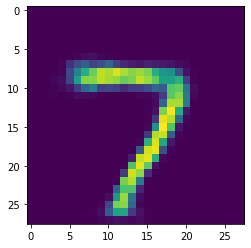

In [32]:
plt.imshow(passed_images[0])

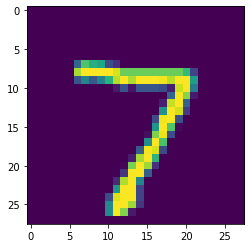

In [33]:
plt.imshow(X_test[0])

# AutoEncoders for Denoising Images

In [34]:
from tensorflow.keras.layers import GaussianNoise

In [35]:
sample = GaussianNoise(0.2)

In [36]:
noisey = sample(X_test[0:2],training=True)

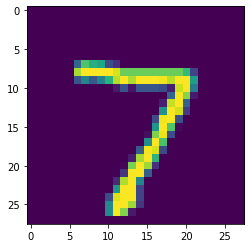

In [37]:
plt.imshow(X_test[0])

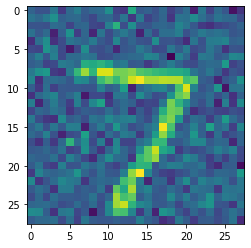

In [38]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

In [39]:
import tensorflow as tf
import numpy as np

In [40]:
# TO create the exact same noise as us (optional)
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [41]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [45]:
noise_remover = Sequential([encoder, decoder])

In [46]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [47]:
noise_remover.fit(X_train, X_train, epochs=8,
                           validation_data=(X_test, X_test))

Epoch 1/8
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1295 - accuracy: 0.2332 - val_loss: 0.1195 - val_accuracy: 0.2413
Epoch 2/8
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1209 - accuracy: 0.2444 - val_loss: 0.1148 - val_accuracy: 0.2510
Epoch 3/8
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1169 - accuracy: 0.2514 - val_loss: 0.1119 - val_accuracy: 0.2632
Epoch 4/8
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1134 - accuracy: 0.2581 - val_loss: 0.1079 - val_accuracy: 0.2695
Epoch 5/8
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1103 - accuracy: 0.2633 - val_loss: 0.1067 - val_accuracy: 0.2632
Epoch 6/8
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1081 - accuracy: 0.2677 - val_loss: 0.1043 - val_accuracy: 0.2670
Epoch 7/8
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1063 - accuracy: 0.2710 - val_loss: 0.1035 - val_ac

In [48]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


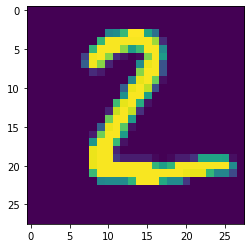

The Noisey Version


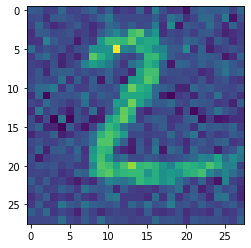

After going through denoiser


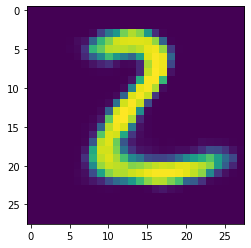

In [49]:
n = 1
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()